In [48]:
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Univariate Linear Regression 

In this case, dependent variable is dependent upon single independent variable. It is given as:

$$ y = b_{0} + m_{1}b_{1}$$

In [29]:
dataset = pd.read_csv("./student_scores_linearRegressionDataset.csv")
student_dataframe = pd.DataFrame(dataset)
student_dataframe

Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

In [30]:
student_dataframe.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

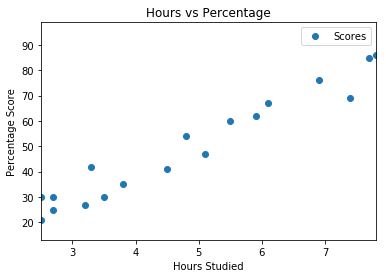

In [31]:
student_dataframe.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()  

In [45]:
# Prepare dataset for training 
train, test = train_test_split(student_dataframe, test_size = 0.2)

features_train = train.iloc[:,[0]]
true_train_labels = train.iloc[:,[1]]

features_test = test.iloc[:,[0]]
true_test_labels = test.iloc[:,[1]]
# Train model 

scoreModel = LinearRegression()
scoreModel.fit(features_train, true_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
predicted_output = scoreModel.predict(features_test)
predicted_dataframe = pd.DataFrame(predicted_output, columns=["predicted output"])
true_test_labels = np.array(true_test_labels)
predicted_dataframe["True output"] = true_test_labels
predicted_dataframe
# df = pd.DataFrame({'Actual': true_test_labels, 'Predicted': predicted_output})  
# df

predicted output  True output
0         28.301341           25
1         34.177119           42
2         77.266155           85
3         48.866563           54
4         91.955599           88

# Evaluating of Regression Model 

We can compute error of the model using: 

i. ** Mean Absolute Error (MAE)**: It is the mean of the absolute value of the errors.

ii. **Mean Squared Error (MSE)**: It is the mean of the squared errors

iii. **Root mean square error (RMSE)**: It is the square root of the mean of the squared errors

In [50]:
print('Mean Absolute Error:', mean_absolute_error(true_test_labels, predicted_output))  
print('Mean Squared Error:', mean_squared_error(true_test_labels, predicted_output))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(true_test_labels, predicted_output)))

('Mean Absolute Error:', 5.589420697036591)
('Mean Squared Error:', 34.781524408723854)
('Root Mean Squared Error:', 5.897586320582672)


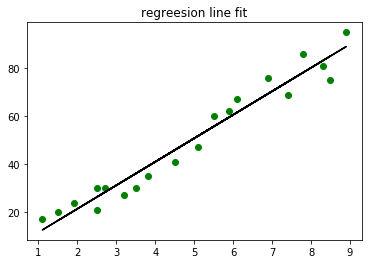

In [57]:
plt.scatter(features_train, true_train_labels,color='g')
plt.plot(features_train, scoreModel.predict(features_train),color='k')
plt.title("regreesion line fit")
plt.show()

# Multivariate or Multi-variable Linear Regression

Consider a scenario where you have to predict the price of house based upon its area, number of bedrooms, average income of the people in the area, the age of the house, and so on. In this case the **dependent variable is dependent upon several independent variables**. A regression model involving multiple variables can be represented as:

$$  y = b_{0} + m_{1}b_{1} + m_{2}b_{2} + m_{3}b_{3} + ... ... m_{n}b_{n} $$

In [61]:
housingData = load_boston()

housingdf = pd.DataFrame(housingData.data, columns=housingData.feature_names)
housingdf["price"] = housingData.target
housingdf

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   5.0  311.0   
12    0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
13    0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075   4.0  307.0   
14    0.63796   0.0   8.14   0.0  0.538  6.096   84.5  4.4619   4.0  307.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
17    0.78420   0.0   8.14   0.0  0.538  5.990   81.7  4.2579   4.0  307.0   
18    0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965   4.0  307.0   
19    0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965   4.0  307.0   
20    1.25179   0.0   8.14   0.0  0.538  5.570   98.1  3.7979   4.0  307.0   
21    0.85204   0.0   8.14   0.0  0.538  5.965   89.2  4.0123   4.0  307.0   
22    1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
23    0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952   4.0  307.0   
24    0.75026   0.0   8.14   0.0  0.538  5.924   94.1  4.3996   4.0  307.0   
25    0.84054   0.0   8.14   0.0  0.538  5.599   85.7  4.4546   4.0  307.0   
26    0.67191   0.0   8.14   0.0  0.538  5.813   90.3  4.6820   4.0  307.0   
27    0.95577   0.0   8.14   0.0  0.538  6.047   88.8  4.4534   4.0  307.0   
28    0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
29    1.00245   0.0   8.14   0.0  0.538  6.674   87.3  4.2390   4.0  307.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
476   4.87141   0.0  18.10   0.0  0.614  6.484   93.6  2.3053  24.0  666.0   
477  15.02340   0.0  18.10   0.0  0.614  5.304   97.3  2.1007  24.0  666.0   
478  10.23300   0.0  18.10   0.0  0.614  6.185   96.7  2.1705  24.0  666.0   
479  14.33370   0.0  18.10   0.0  0.614  6.229   88.0  1.9512  24.0  666.0   
480   5.82401   0.0  18.10   0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
481   5.70818   0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
482   5.73116   0.0  18.10   0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
483   2.81838   0.0  18.10   0.0  0.532  5.762   40.3  4.0983  24.0  666.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
485   3.67367   0.0  18.10   0.0  0.583  6.312   51.9  3.9917  24.0  666.0   
486   5.69175   0.0  18.10   0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
487   4.83567   0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
488   0.15086   0.0  27.74   0.0  0.609  5.454   92.7  1.8209   4.0  711.0   
489   0.18337   0.0  27.74   0.0  0.609  5.414   98.3  1.7554   4.0  711.0   
490   0.20746   0.0  27.74   0.0  0.609  5.093   98.0  1.8226   4.0  711.0   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
492   0.11132   0.0  27.74   0.0  0.609  5.983   83.5  2.1099   4.0  711.0   
493   0.17331   0.0   9.69   0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
494   0.27957   0.0   9.69   0.0  0.585  5.926   42.6  2.3817   6.0  391.0   
495   0.17899   0.0   9.69   0.

In [62]:
train, test = train_test_split(housingdf, test_size = 0.2)
train

CRIM     ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
113   0.22212    0.0  10.01   0.0  0.5470  6.092   95.4  2.5480   6.0  432.0   
184   0.08308    0.0   2.46   0.0  0.4880  5.604   89.8  2.9879   3.0  193.0   
86    0.05188    0.0   4.49   0.0  0.4490  6.015   45.1  4.4272   3.0  247.0   
467   4.42228    0.0  18.10   0.0  0.5840  6.003   94.5  2.5403  24.0  666.0   
88    0.05660    0.0   3.41   0.0  0.4890  7.007   86.3  3.4217   2.0  270.0   
278   0.07978   40.0   6.41   0.0  0.4470  6.482   32.1  4.1403   4.0  254.0   
149   2.73397    0.0  19.58   0.0  0.8710  5.597   94.9  1.5257   5.0  403.0   
211   0.37578    0.0  10.59   1.0  0.4890  5.404   88.6  3.6650   4.0  277.0   
221   0.40771    0.0   6.20   1.0  0.5070  6.164   91.3  3.0480   8.0  307.0   
162   1.83377    0.0  19.58   1.0  0.6050  7.802   98.2  2.0407   5.0  403.0   
292   0.03615   80.0   4.95   0.0  0.4110  6.630   23.4  5.1167   4.0  245.0   
171   2.31390    0.0  19.58   0.0  0.6050  5.880   97.3  2.3887   5.0  403.0   
343   0.02543   55.0   3.78   0.0  0.4840  6.696   56.4  5.7321   5.0  370.0   
120   0.06899    0.0  25.65   0.0  0.5810  5.870   69.7  2.2577   2.0  188.0   
273   0.22188   20.0   6.96   1.0  0.4640  7.691   51.8  4.3665   3.0  223.0   
104   0.13960    0.0   8.56   0.0  0.5200  6.167   90.0  2.4210   5.0  384.0   
131   1.19294    0.0  21.89   0.0  0.6240  6.326   97.7  2.2710   4.0  437.0   
176   0.07022    0.0   4.05   0.0  0.5100  6.020   47.2  3.5549   5.0  296.0   
89    0.05302    0.0   3.41   0.0  0.4890  7.079   63.1  3.4145   2.0  270.0   
332   0.03466   35.0   6.06   0.0  0.4379  6.031   23.3  6.6407   1.0  304.0   
4     0.06905    0.0   2.18   0.0  0.4580  7.147   54.2  6.0622   3.0  222.0   
18    0.80271    0.0   8.14   0.0  0.5380  5.456   36.6  3.7965   4.0  307.0   
73    0.19539    0.0  10.81   0.0  0.4130  6.245    6.2  5.2873   4.0  305.0   
323   0.28392    0.0   7.38   0.0  0.4930  5.708   74.3  4.7211   5.0  287.0   
193   0.02187   60.0   2.93   0.0  0.4010  6.800    9.9  6.2196   1.0  265.0   
224   0.31533    0.0   6.20   0.0  0.5040  8.266   78.3  2.8944   8.0  307.0   
429   9.33889    0.0  18.10   0.0  0.6790  6.380   95.6  1.9682  24.0  666.0   
295   0.12932    0.0  13.92   0.0  0.4370  6.678   31.1  5.9604   4.0  289.0   
7     0.14455   12.5   7.87   0.0  0.5240  6.172   96.1  5.9505   5.0  311.0   
357   3.84970    0.0  18.10   1.0  0.7700  6.395   91.0  2.5052  24.0  666.0   
..        ...    ...    ...   ...     ...    ...    ...     ...   ...    ...   
376  15.28800    0.0  18.10   0.0  0.6710  6.649   93.3  1.3449  24.0  666.0   
27    0.95577    0.0   8.14   0.0  0.5380  6.047   88.8  4.4534   4.0  307.0   
448   9.32909    0.0  18.10   0.0  0.7130  6.185   98.7  2.2616  24.0  666.0   
472   3.56868    0.0  18.10   0.0  0.5800  6.437   75.0  2.8965  24.0  666.0   
225   0.52693    0.0   6.20   0.0  0.5040  8.725   83.0  2.8944   8.0  307.0   
31    1.35472    0.0   8.14   0.0  0.5380  6.072  100.0  4.1750   4.0  307.0   
141   1.62864    0.0  21.89   0.0  0.6240  5.019  100.0  1.4394   4.0  437.0   
232   0.57529    0.0   6.20   0.0  0.5070  8.337   73.3  3.8384   8.0  307.0   
60    0.14932   25.0   5.13   0.0  0.4530  5.741   66.2  7.2254   8.0  284.0   
389   8.15174    0.0  18.10   0.0  0.7000  5.390   98.9  1.7281  24.0  666.0   
288   0.04590   52.5   5.32   0.0  0.4050  6.315   45.6  7.3172   6.0  293.0   
255   0.03548   80.0   3.64   0.0  0.3920  5.876   19.1  9.2203   1.0  315.0   
430   8.49213    0.0  18.10   0.0  0.5840  6.348   86.1  2.0527  24.0  666.0   
41    0.12744    0.0   6.91   0.0  0.4480  6.770    2.9  5.7209   3.0  233.0   
294   0.08199    0.0  13.92   0.0  0.4370  6.009   42.3  5.5027   4.0  289.0   
121   0.07165    0.0  25.65   0.0  0.5810  6.004   84.1  2.1974   2.0  188.0   
246   0.33983   22.0   5.86   0.0  0.4310  6.108   34.9  8.0555   7.0  330.0   
207   0.25199    0.0  10.59   0.0  0.4890  5.783   72.7  4.3549   4.0  277.0   
460   4.8

In [63]:
# Create a list of the feature column's names
train_features = train.iloc[:,0:13]
# train_features
train_classes = train.iloc[:,[13]] # last column as classes
# train_classes
test_features = test.iloc[:,0:13]
test_classes = test.iloc[:,[13]]
model = LinearRegression()
model.fit(train_features, train_classes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
predicted_output = model.predict(test_features)
test_classes = np.array(test_classes)
test_features = np.array(test_features)
predicted_output = np.array(predicted_output)
predicted_output = np.round(predicted_output, 1)
# mean_squared_error(test_classes.tolist(), predicted_output.tolist())
print "13 trained weights based on each independent variable \n", model.coef_

13 trained weights based on each independent variable 
[[-1.32007120e-01  2.79077953e-02 -2.52985449e-02  2.52799340e+00
  -1.72269780e+01  3.28838613e+00  7.28817657e-03 -1.50992434e+00
   2.70924367e-01 -9.02783716e-03 -9.81328248e-01  9.96147515e-03
  -6.10404688e-01]]


In [65]:
print('Mean Absolute Error:', mean_absolute_error(test_classes, predicted_output))  
print('Mean Squared Error:', mean_squared_error(test_classes, predicted_output))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_classes, predicted_output)))

('Mean Absolute Error:', 3.4862745098039207)
('Mean Squared Error:', 20.943529411764704)
('Root Mean Squared Error:', 4.576410100915859)
